Q63. 네이버 검색에서 관심 주제와 기사 수를 입력하면 그만큼 출력하는 크롤링 프로그램을 작성하여 다음 사항을 수행하세요.

기사 제목과 링크를 데이터프레임으로 가져온 후 본문 내용에서 한글 단어만 출력하여 형태소 분석 최근 국내 'AI'와 관련하여 가장 많이 언급되는 단어에 대한 빈도분석 및 시각화 AI 분야에서의 유의할 만한 트랜드 정보 및 인사이트 도출

In [ ]:
#불용어처리 - 빈도분석 - 시각화 - 워드클라우드

In [ ]:
# url = https://search.naver.com/search.naver?where=news&sm=tab_jum&query=

## 네이버뉴스 + 개별신문사 코드 만들기 

In [ ]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

In [45]:
# 중복행 제거
dup = news_df.duplicated(['title'], keep='first')
dup

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [2]:
news_df = news_df.drop_duplicates(['title'], keep='first') # 첫번째만 남기기
news_df

NameError: name 'news_df' is not defined

In [49]:
# 리스트 li에 항상 마지막 기사만 들어가게 되어있어서 그부분 수정했어요 

headers = {"user-agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}

import requests
import re 

def news_contents_crawler(news_url):
    li = []
    for i in news_url: 
        try:
            news = requests.get(i, headers=headers)
            news_html = BeautifulSoup(news.text,"html.parser")
        except:
            pass

        texts = news_html.find_all('p')

        for t in texts:
            text = t.get_text()
            text = re.sub('[^가-힣]+',' ', text)

            li.append(text)
            
    li = ' '.join(li)
    result = re.sub('\s{2,}', ' ', li)
    return result

news_li = news_df['url'].tolist()
result = news_contents_crawler(news_li)
result    

' 정치 경제 사회 문화 스포츠 인물 오피니언 지역 강원일보 복지몰 사이트 어린이강원일보 함께사는 강원세상 모바일 모바일 앱 모바일 웹 신문구독 구독신청 지면보기 광고안내 신문지면 광고 전광판 광고 홈페이지 배너광고 광고국 조직 게시판 독자게시판 기사제보 독자투고 멤버쉽 로그인 회원가입 이용약관 개인정보취급방침 문화체육행사 절 시민건강 달리기 호반마라톤 고성 평화통일 걷기대회 만해축전 전국고교백일장 지역 어린이 학부모 주민 위한 교양 문화교실 등 다채 화천 화천군이 운영하는 공공 도서관이 독서문화 확산에 나섰다 화천 공공도서관은 지난 일부터 월 독서문화행사 참가자 모집에 나서며 본격적으로 하반기 공공 도서관 운영을 시작했다 우선 오는 일 화천어린이도서관 다목적실에서 일요일 유아 영어 체육 행사를 진행한다 일부터 모집을 시작한 이번 체험은 세 유아와 부모를 대상으로 열리며 박상원 탐스스포츠 영어체육 원장이 진행한다 이에 앞서 일에는 화천어린이도서관에서 공부머리 문해력 키우기 부모교육 특강이 이어진다 강사로는 아이중심 독서교육연구소 책나들이 대표인 김윤정 작가가 참여하며 온라인으로 명 선착순 신청을 접수한다 오는 일에는 화천어린이도서관과 사내도서관에서 독서와 원예를 결합한 플로리스트와 함께 하는 그림책 읽기 프로그램이 열린다 이와함께 초등생과 미취학 아동을 위한 하반기 독서문화강좌가 월까지 화천어린이도서관과 사내도서관에서 이어진다 화천어린이도서관에서는 도전 위인 탐험대 종이접기 교실 창의 인성놀이 초등미술 로봇과학 등의 강좌가 마련된다 사내도서관에서는 과학천재 실험왕 키즈요가와 키즈쿠팅 세계문학탐구교실 독서토론 한자교실 등의 커리큘럼이 운영된다 영상 김진태 지사 강원도청 이전 부지 연말 발표 이혜연 농구선수 출신 고졸여성이 은행 지점장까지 된 비결요 버텨야 한다는 간절함 때문 나를 믿어야 얻을 수 있더군요 국내 시중 은행과 인터넷 은행 등에서 여성 임원 비율은 크게 낮다 최근 기업과 공공기관에서 여성의 약진이 두드러지고 있지만 금융권의 유리천장은 유독 두껍다는 인

In [ ]:
result.to_txt

In [ ]:
!pip install konlpy wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.5 MB/s 
     |████████████████████████████████| 453 kB 50.9 MB/s 


In [86]:
df_stop_words = df_test.head(50)
stop_word = df_stop_words['index'].tolist()

In [87]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word_manual=['기자', '서비스']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word or not in stop_word_manual:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기


#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
df

#data10 = df[:10]
#data10

index   cnt
0       서비스  1956
1        기자  1830
2        지원  1693
3        위해  1515
4        추진  1295
...     ...   ...
14332    일만     1
14333    감국     1
14334    감미     1
14335   조선대     1
14336    자미     1

[14337 rows x 2 columns]

In [1]:
df_test= df[df['cnt'] > 10]  #몇 개 이상 뽑아낼 건지 정하기 
df_test

NameError: name 'df' is not defined

In [88]:
# 한글폰트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Password:
sudo: a password is required
Password:
sudo: a password is required
rm: /Users/thing/.cache/matplotlib: No such file or directory
rm: -rf: No such file or directory


In [ ]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')# 한글 폰트 설정

# 시각화
sns.barplot(x='index', y='cnt', data=data10, orient='v')

(-0.5, 3999.5, 2999.5, -0.5)

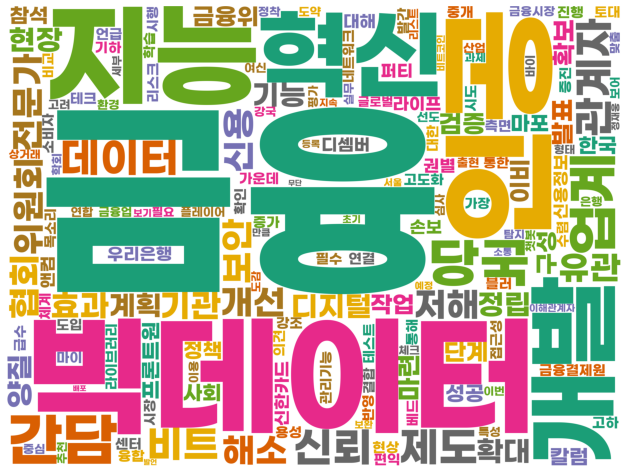

In [ ]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=161).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기